In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import matplotlib
import splinelib as tsp

(400, 2) (400, 1)


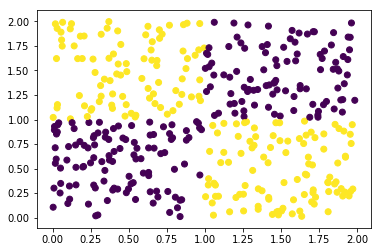

In [2]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [3]:
colors = ['r', 'y', 'g', 'b']

### To fit the data we need 2 projection--->prediction

In [79]:
max_points = 5
lr=0.1

x1, x2 = x[:, 0], x[:, 1]

spline1 = tsp.Spline1D(max_points, x1, y)
spline2 = tsp.Spline1D(max_points, x2, y)
linear = tnn.LinearLayer(2,1, optimizer=tnn.SGD(lr))

# sigmoid = tnn.Sigmoid()
sigmoid = tnn.Linear()

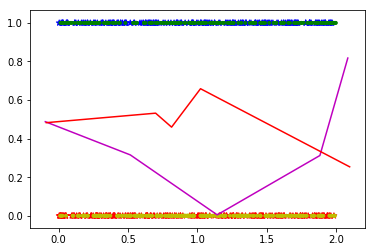

In [80]:
%matplotlib inline
plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r')

_______________________
Steps 0
Error 0.7781854504931656


_______________________
Steps 100
Error 0.2482417921293774


_______________________
Steps 200
Error 0.24645631812057744


_______________________
Steps 300
Error 0.2454332901670349


_______________________
Steps 400
Error 0.24461569125096314


_______________________
Steps 500
Error 0.24394829892750974


_______________________
Steps 600
Error 0.2434041658625449


_______________________
Steps 700
Error 0.24300360765212298


_______________________
Steps 800
Error 0.24272637477860853


_______________________
Steps 900
Error 0.24254550585828305


_______________________
Steps 1000
Error 0.24243414029218546


_______________________
Steps 1100
Error 0.2422979621055896


_______________________
Steps 1200
Error 0.24220262426139968


_______________________
Steps 1300
Error 0.24215346581136768


_______________________
Steps 1400
Error 0.2421312215670952


_______________________
Steps 1500
Error 0.24211318698611126


__________

TclError: invalid command name "pyimage296"

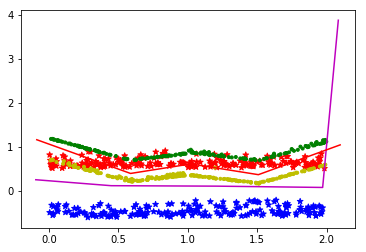

In [81]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
for step in range(100000):
    x1, x2 = x[:, 0], x[:, 1]
    
    Y1 = spline1.forward(x1)
    Y2 = spline2.forward(x2)
    Y12 = np.c_[Y1, Y2]
    Y = linear.forward(Y12)
    Y = sigmoid.forward(Y)
    
    dy = Y-y
    dy12 = linear.backward(dy)
    dy1, dy2 = dy12[:, 0], dy12[:, 1]
    
    dx_1 = spline1.backward(dy1)
    dx_2 = spline2.backward(dy2)
    dx = np.c_[dx_1, dx_2]

    spline1.update(lr)
    spline2.update(lr)
    linear.update()
    
    if step % 1000 == 0:
        splines = [spline1, spline2]
        for spline in splines:
            spline._combine_linear_points_()
            spline._remove_close_points_()
            spline._remove_no_input_points_()
            spline._add_new_point_()
                
    if step % 100 == 0:
            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        out = (Y>0.5).astype(int)
        
        plt.scatter(x1, Y1+dy1, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
        plt.scatter(x2, Y2+dy2, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))
        plt.plot(spline1.X, spline1.Y, color='m')
        plt.plot(spline2.X, spline2.Y, color='r')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

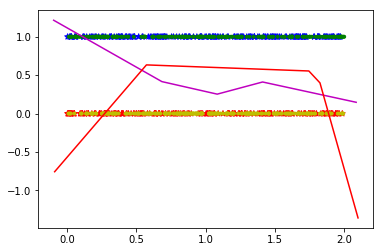

In [64]:
%matplotlib inline
x1, x2 = x[:, 0], x[:, 1]
Y1 = spline1.forward(x1)
Y2 = spline2.forward(x2)
Y12 = np.c_[Y1, Y2]
Y = linear.forward(Y12)
Y = sigmoid.forward(Y)
out = (Y>0.5).astype(int)

plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))
plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r')

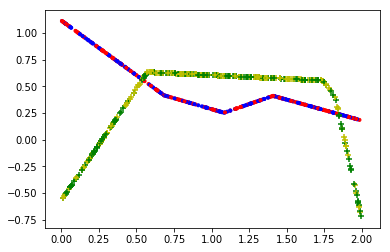

In [65]:
plt.scatter(x1, Y1, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, Y2, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

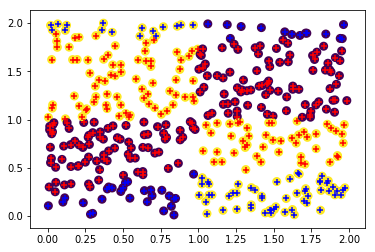

In [66]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=3)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

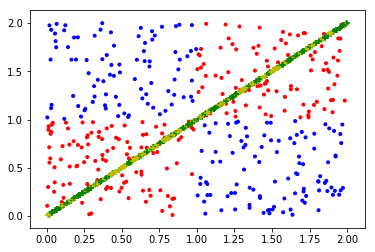

In [67]:
plt.scatter(x[:,0], x2, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], x2, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

In [68]:
linear.weights

array([[-0.64033349],
       [-0.93270046]])

In [69]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

x1, x2 = xxyy[:, 0], xxyy[:, 1]
Y1 = spline1.forward(x1)
Y2 = spline2.forward(x2)
Y12 = np.c_[Y1, Y2]
Y = linear.forward(Y12)
Y = sigmoid.forward(Y)
out = (Y>0.5).astype(int)

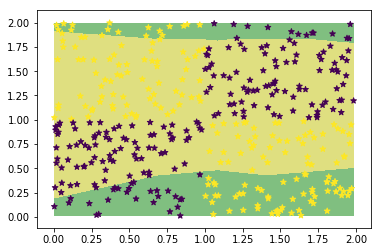

In [70]:
plt.imshow(out.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')